<a href="https://colab.research.google.com/github/JMindpalace/Machine_Learning/blob/main/5.0%20%EB%AA%A8%EB%8D%B8%20%ED%95%99%EC%8A%B5%20%EB%B0%8F%20%EC%98%88%EC%B8%A1%2C%20%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

< 해당 페이지는 **머신러닝 - 모델의 설명과 학습, 예측과 평가**를 중점으로 다룬 페이지입니다.>

> 크게 지도, 비지도, 강화 학습으로 분류되었으며<br>
> 지도학습은 회귀와 분류로 중분류가 되어있고<br>

> 주로 사용되는 모듈은 Sk-learn(머신러닝)과 keras(딥러닝)입니다.<br>
> 딥러닝에는 tensorflow, pytorch도 가능합니다.

> 기대 결과값: 일반화(Generalization, 테스트에 잘 적응하는 능력)가 잘되는 모델 선택<br>
> 또한 모델의 과정을 이해하여 Black-box 문제도 해결

# Machine Learing(ML)

## ML 방향성
> 데이터로부터 유용한 예측을 하는 모델(특성과 타겟의 수학적 관계)의 학습 과정<br>
> 기존 데이터 패턴(규칙)을 학습 후 새로운 데이터로 예측

ML의 연습 프로세스
1. 문제에 적합한 모델 선택 후 속성이나 하이퍼파라미터 확인
2. 데이터를 fit()으로 모델 학습
3. predict()로 새로운 데이터 예측

> https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API

# 모델 구분 및 주의사항, 파이프라인

In [ ]:
from sklearn.linear_model import LinearRegression # 선형회귀모델
from sklearn.preprocessing import PolynomialFeatures # 선형회귀 - 다항선형모델
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # 모델 성능 평가

In [ ]:
Train.fit_transform # 데이터 학습 - 훈련, 검증(Val) 데이터는 fit와 transform까지 가능함
Test.transform      # 데이터 변환 - 테스트 데이터의 경우 무조건 transform만 시행함

fit Attributes( 끝에 _가 붙은 메소드)

In [ ]:
# Pipeline(파이프라인) - 모델 계산을 위해 여러 번의 fit을 파이프라인으로 압축함
make_pipeline(PolynomialFeatures(degree),
              StandardScaler(),
              LinearRegression(**kwargs))
pipe = make_pipeline()
pipe.fit(x,y)

pipe.named_steps['linearregression'].coef_

## 지도(Supervised)-학습: 답(Target)이 있는 데이터로 모델을 훈련하여 규칙 도출
> Column 구분: 모델 학습은 Feature, label은 Target

### 회귀(Regression)모델: 연속적인 타겟(트렌드, 경향 등) 예측
> 특성(X, 독립변수)과 타겟(Y, 종속변수)의 선형적 관계(회귀계수로 표현, X에 따른 Y의 변화)<BR>

EX.) 예측
1. 수명(Estimating Life Expectancy)
2. 인구(Population Growth Prediction)
3. 시장(Market Forecasting)
4. 광고 인기(Advertising Popularity Prediction)
5. 일기 예보(Weather Forecasting)

In [ ]:
X, y = df.columns.drop('target'), df['target_data'] # int형

In [ ]:
# 0. 기준 모델 - 예측 모델을 판단(하한선)기준 (시계열회귀 이전 타임스탬프의 값)
predict = y_train[target].mean() # 회귀는 평균값 - 예측모델과 보간/외삽 비교에 사용
base = predict * len(y_train)    # 기준모델 - 모델 성능 평가의 기준
# 기준모델 평가는 ( y_train, base )

최고의 회귀 예측모델 = 실제값(y) - 예측값(αx+β) = 잔차(Residual)가 0<br>
(오차(Error)는 모집단의 실제값과 예측값의 차이)

최적의 회귀 예측모델 = OLS(Ordinary Least Square)<br>
RSS(R sum of Squares, 잔차 제곱들의 합, 비용함수)이 최소가 되는 α, β를 가진 직선

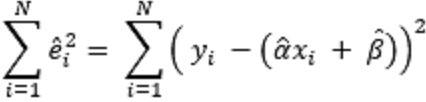

In [ ]:
# 회귀선
sns.regplot( x = df[feature] , y = df[target] )

지난 데이터 분석에서 분리한 특성과 타겟 데이터를 사용함
1. 특성 행렬: 2차원 = [ n_samples, n_features ] (Numpy 행렬, Pandas 데이터프레임)
   > X = df[feature]
2. 타겟 행렬: 1차원 = n_target (Numpy 배열, Pandas 시리즈)
   > y = df[target]

In [ ]:
from sklearn.linear_model import LinearRegression
# 1. 예측 모델
# 단순 선형(Simple Linear Regression, y = ax+b ): X값은 df['1_feature']
simple_ols = LinearRegression()
simple_ols.fit(X,y)

# 다중 선형(Multiple, y = a1x1 + a2x2 + b): X값은 2개 이상 - df[ '1_feature' , '2_feature' ]
multiple_ols = LinearRegression()
multiple_ols.fit(X, y)


# 다항 선형 회귀(Polynomial, a1x1 + a2x1**2 + b): 2차항(degree로 최고차항 조정) 이상의 식
from sklearn.preprocessing import PolynomialFeatures # 독립&타겟 변수 사이에 비선형 관계 학습 가능
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

poly_ols = PolynomialRegression(degree=2)
poly_ols.fit(X, y)

In [ ]:
# 2. 예측 모델의 예측값: 보간(Interploate, 학습구간 내) 과 외삽(Extrapolate, 학습구간 외)
# 여기서 계산된 예측값을 모델 성능 평가에 y_pred로 넘겨 점수를 반환 받는다
simp_predict = simple_ols.predict([[예측값]])[0]               # 단순 scatter - x=예측값, y=simp_predict
mult_predict = multiple_ols.predict([[ 예측값x, 예측값y ]])[0] # 다중 선형 - 예측값을 변수로는 df[feature]
poly_predict = poly_ols.predict([[ 예측값x, 예측값y ]])[0]     # 다항 선형

In [ ]:
# 3. 회귀 모델 성능 평가 지표
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_models( y_pred, y_real = y ) : 
  mse = mean_squared_error( 모델의 예측값 , y ) # MSE(Mean Squared Error): (실제값-예측값)제곱오차의 평균
  np.sqrt(mse)                                  # RMSE(Root MSE)
  mean_absolute_error( 모델의 예측값 , y )      # MAE(Mean Absolute Error): |실제값-예측값|절대오차의 평균
  r2_score( 모델의 예측값 , y )                 # R-Squared(Coefficient of determination): 1일수록 높은 설명력

RMSLE(Root Mean Squared Log Error)

# 빠른 R2 점수 출력
from sklearn.model_selection import cross_val_score
print_score(model, X_fit&transform_train, y_train, x_fit_test, y_test )

In [ ]:
# 4. 모델 해석(추론) - coef(상관계수, 상관계수 1증가마다 타겟의 증가량)와 intercept(절편- 해석 없음)
# 선형모델 반환값 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
simple_ols.coef_   / simple_ols.intercept_   # coef 출력 순서는 입력한 Feature의 순서에 따라 반환됨
multiple_ols.coef_ / multiple_ols.intercept_
poly_ols.coef_     / poly_ols.intercept_



---



---



### 분류(Classification)모델: 카테고리/클래스 예측
> 이진(Binary) / 다중(Multi-class) 분류 등 특정 범주에 속할 확률 예측<BR>

EX.)
1. 고객 관리(Customer Retention)
2. 진단(Diagnostics)
3. 이미지 분류(Image Classification)
4. 사기 탐지(Identity Fraud Detection)

In [ ]:
# 필수: 분류문제는 타겟의 범주 비율을 우선 확인
y = df['target']; y.value_counts(normalize=True);
%matplotlib inline; sns.countplot(x=y);

#### 로지스틱회귀(Logistic Regression)
> sklearn에서는 L2 패널티가 자동 적용되어 표준화 필수

In [ ]:
# 0. 기준모델 - 분류는 타겟의 최빈 클래스
base = y_train.mode()[0]
base_pred = [base] * len(y_train)

In [ ]:
# 1. 예측모델 - 로지스틱회귀sigmoid+선형회귀): 0~1사이의 값
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced') ) # 파라미터는 클래스별 가중치 적용
lr.fit(X, y)

lr.coef_ # 로지스틱 회귀계수 - 양수일수록 1, 음수일수록 0일 확률이 각각 높아짐, 영향력은 절댓값
lr.feature_names_in_

In [ ]:
# 2. 예측 모델의 예측값
pred = lr.predict( X )
pred = lr.predict_proba( x )[:,1]

In [ ]:
# 3. 모델 성능 평가 - 레이블을 올바르게 학습했는지 정밀도로 검증
# 정확도(Accuracy) = 올바른 예측/전체 예측
from sklearn.metrics import accuracy_score
accuracy_score( y_train, predict )

# 정밀도(Precision) = 올바른 Positive 예측 / 예측 Positive(T+F) - 재현율과 반비례 관계
# 재현율(Recall) = 올바른 Positive 예측 / 실제 Positive
# F1 score = (2*정밀도) / (정밀도+재현율)

# Confusion Matrix(혼동&오차행렬): 예측값과 실제 결과를 표시한 테이블


In [ ]:
# 4. 예측(모델이 예측하는 확률)값을 평가하는 지표
# ROC(Receiver Operating Characteristic): 임계값의 TPR, FPR의 비율
# TPR = TP/P = TP/TP+FN = 1-FNR , 임계값이 1이면 TPR&FPR 모두 0
# FPR = FP/N = FP/FP+TN = 1-TNR , 임계값이 0이면 TPR&FPR 모두 1

# AUC(Area Under the Curve): ROC 곡선 아래면적, 1일수록 좋은 모델

### 회귀&분류 공통 모델
> 결정트리(Tree Based Model)<br>
> 타겟: (분류는 최빈값, 회귀는 평균)의 예측값

In [ ]:
# 결정트리(Decision Tree): 비용함수(분류는 불순도 / 회귀는 MSE)에 따라 분기

# Imformation Gain(엔트로피)

# Gini Impurity(지니불순도)

# 모델 해석은 시각화와 특성중요도

In [ ]:
# 앙상블 중 Bagging: Boot-strapped(OOB, 추출안된 샘플) > 분기(일부 랜덤 특성 선택) > 앞의 2과정 반복(독립&병렬적)
# 랜덤-포레스트(Random-Forest): 분류는 다수결, 회귀는 평균의 전체 결과를 집계(Var를 줄여 과적합 해결)

In [ ]:
# 앙상블 중 Boosting: 이전 모델의 오류를 보완하며 순차적 모델 학습(Bias를 줄여 과소적합 해결)
# AdaBoost: 분류문제에 적합, 이상치에 민감, 샘플링 후 잘못 분류된 관측치에 가중치를 부여하여 다음 샘플링에 반영

# Gradient Boosting: 회귀&분류 모두 적합, 잔차를 학습하여 잔차를 줄이는 방식



---



---



## 비지도(Un-supervised)-학습: 답이 없는 데이터로 구조나 패턴 탐색
> 특징/패턴 도출 등(지도학습의 전처리에도 사용 가능)
> https://en.wikipedia.org/wiki/Unsupervised_learning#:~:text=Unsupervised%20learning%20is%20a%20type,generate%20imaginative%20content%20from%20it.

### Clustering(클러스터링): 비슷한 성질의 데이터끼리 그룹화<BR>

EX.) 
1. 타겟 마케팅(Target Marketing)
2. 고객 세분화(Customer Segmentation)
3. 추천 시스템(Recommender Systems)

In [ ]:
# 중요 포인트 1. 그룹의 수

In [ ]:
# 중요 포인트 2. 유사도의 정의

In [ ]:
# Elbow method : 최적의 클러스터 개수 찾기

### 차원 축소(Dimensionality Reduction): 고차원 데이터셋의 차원 감소
> 차원의 저주(The Curse of Dimensionality) 해소<br>
> (복잡한 시각화, 시간적 비효율성, 과적합 해소)<br>
> 단, 정보손실은 최소화하면서 중요한 변수만 선택

EX.) 
1. 특징 도출(Feature Elicitation)
2. 의미 압축(Meaningful Compression)
3. 빅데이터 시각화(BigData Visualization)
4. 구조 분석(Structure Discovery)



#### Feature Selection
> 덜 중요한 Feature 제거하여 선택된 소수 Feature의 직접 고려한 연관성으로 쉬운 해석

#### Feature Extraction
> 기존 Feature의 상관관계를 고려하여 선형결합으로 조합, 어려운 해석

##### PCA: 기존 데이터를 최대한 보존(넓은 분산)하는 새로운 축(PC)에 사영(Linear Projection)하는 저차원 변환 기법
> PC의 단위벡터는 데이터 공분산행렬의 Eigen-Vector<br>
> Eigen-Vector에 사영한 분산이 Eigen-Value / 값은 기존 데이터 ⊥ Eigen-Vector

In [ ]:
# PCA 1. 데이터 표준화(전처리 StandardScaler 참고)
# PCA 2. 공분산행렬 구하기 - matrix = np.cov(data.T)
# PCA 3. 공분산행렬 Eigen-Stuff 구하기 - values, vectors = np.linalg.eig( matrix )
# PCA 4. Eigen-Vector에 사영하기
np.matmul( matrix, vectors ) # 행 단위는 np.dot( matrix[n행] , vectors[: , n행] )

# PCA로 변환된 데이터 중 원하는 차원 선택으로 차원 축소 시행

In [ ]:
# Sklean PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scale = StandardScaler() # 1. 표준화
Z = scale.fit_transform( X )

pca = PCA() # 2~3. PCA
pca.fit(Z)
pca.components_ # Eigen-vectors
pca.explained_variance_ # Eigen-values

pca.tarnsform(Z) # 4. PCA

In [ ]:
# PCA Plot - Explained Variance(Eigen-Value) or Explained Variance Ratio로 주성분의 중요도 표시
def pca_plot(pca):
  val = pca.explained_variance_ratio_ # 분산 비율
  num_components = len( val ) # 분산 길이
  ind = np.arange(num_components) # [0 ~ 분산 길이] 분산 수

  ax, cumvals = plt.subplot(), np.cumsum(vals) # 그래프, 누적 합
  ax.bar(ind, val ) # X = 분산 수 , Y = 분산 비율
  ax.plot(ind, cumvals ) # X = 분산 수 , Y = 누적 분산

  for i in range(num_components):
    ax.anootate(r"%s" % (( str(val[i]*100)[:3])), # 분산 값 3자리 문자열 형식
                (ind[i] , val[i]) # 분산 위치
                va = 'bottom', ha = 'center', fontsize = 13)

pca_plot(pca)

### 연관 규칙 학습(Association Rule Learning): If-Then 형식으로 찾아가는 rule-based 방식
> 데이터셋간의 Item 간(Feature-Feature)의 관계



---



---



## 강화(Reinforcment)-학습: 보상/패널티 중 많은 보상을 획득할 전략으로 예측<BR>
> https://en.wikipedia.org/wiki/Reinforcement_learning

EX.) 
1. 실시간 결정(RealTime Decisions)
2. 로봇 탐색(Robot Navigation)
3. 학습 과제(Learning Tasks)
4. 기술 습득(Skill Acquisition)
5. 게임 AI(Game AI)



---



---



## 준지도(Semi-supervised)-학습<BR>

EX.) 
1. 고객 세분화(Customer Segmentation)
2. 타겟 마케팅(Targeted Marketing)
3. 사이트 분류(Website Classificatioin)
4. 얼굴 인식(Face Recognition)
5. 음성 분석(Speech Analysis)




---



---



## 이상감지(Anomaly Detection)<BR>

EX.) 
1. 사이버 침입(Cyber Intrusion)
2. 신용카드 사기(CreditCard Fraud)